In [60]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

input_size = 784
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001


train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

In [61]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [62]:
examples = iter(train_loader)
samples, labels = examples.next()
print(samples.shape, labels.shape)



torch.Size([100, 1, 28, 28]) torch.Size([100])


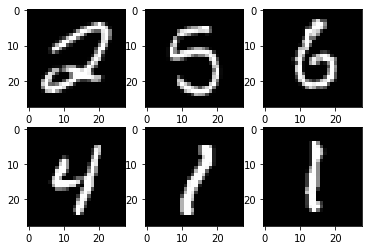

In [63]:
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(samples[i][0], cmap='gray')
plt.show()  

In [64]:
import torch.nn.functional as F
class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes, use_batch_norm=True):
    super(NeuralNet, self).__init__()
    self.use_batch_norm=True
    self.relu = nn.functional.relu
    self.batch_norm1 = nn.BatchNorm1d(hidden_size)
    if use_batch_norm:
      self.fc1 = nn.Linear(input_size, hidden_size, bias=False)
      self.batch_norm1 = nn.BatchNorm1d(hidden_size)
    else:
      self.fc1 = nn.Linear(input_size, hidden_size) 
    
   


    self.fc2 = nn.Linear(hidden_size, num_classes)   
    
    

  def forward(self, x):
    x = self.fc1(x)
    if self.use_batch_norm:
      x = self.batch_norm1(x)
    x = self.relu(x)  
    
    out = self.fc2(x)
    return out

# model_batchnorm = NeuralNet(input_size, hidden_size, num_classes, use_batch_norm=True)    
# model_no_batchnorm = NeuralNet(input_size, hidden_size, num_classes, use_batch_norm=False)
model_batchnorm = NeuralNet(input_size, hidden_size, num_classes,use_batch_norm=False )    

# print(model_batchnorm)
# print()
# print(model_no_batchnorm)


In [65]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_batchnorm.parameters(), lr=learning_rate)

In [66]:
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
  for i,(images, labels) in enumerate(train_loader):
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)

    # forward pass
    outputs = model_batchnorm(images)
    loss = criterion(outputs, labels)

    # backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

Epoch [1/2], Step [1/600], Loss: 2.3990
Epoch [1/2], Step [2/600], Loss: 2.0961
Epoch [1/2], Step [3/600], Loss: 1.8519
Epoch [1/2], Step [4/600], Loss: 1.8243
Epoch [1/2], Step [5/600], Loss: 1.6016
Epoch [1/2], Step [6/600], Loss: 1.5333
Epoch [1/2], Step [7/600], Loss: 1.3850
Epoch [1/2], Step [8/600], Loss: 1.3023
Epoch [1/2], Step [9/600], Loss: 1.3230
Epoch [1/2], Step [10/600], Loss: 1.1806
Epoch [1/2], Step [11/600], Loss: 1.1046
Epoch [1/2], Step [12/600], Loss: 1.2111
Epoch [1/2], Step [13/600], Loss: 1.1467
Epoch [1/2], Step [14/600], Loss: 1.0520
Epoch [1/2], Step [15/600], Loss: 0.9555
Epoch [1/2], Step [16/600], Loss: 1.0581
Epoch [1/2], Step [17/600], Loss: 1.0007
Epoch [1/2], Step [18/600], Loss: 0.9654
Epoch [1/2], Step [19/600], Loss: 0.9903
Epoch [1/2], Step [20/600], Loss: 0.9334
Epoch [1/2], Step [21/600], Loss: 0.9433
Epoch [1/2], Step [22/600], Loss: 0.8684
Epoch [1/2], Step [23/600], Loss: 0.9374
Epoch [1/2], Step [24/600], Loss: 0.8602
Epoch [1/2], Step [25/600

In [67]:
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  for images, labels in test_loader:
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)
    outputs = model_batchnorm(images)
    _, predicted = torch.max(outputs.data, 1)  #1 indicates return max of row # predicted will store index of the label having highest probability
    n_samples += labels.size(0)  
    n_correct += (predicted==labels).sum().item()

  acc = 100.0 * n_correct / n_samples
  print(f'Accuracy of the network on the 10000 test images: {acc} %')


Accuracy of the network on the 10000 test images: 96.31 %


In [68]:
#Accuracy of the network on the 10000 test images without batchnorm: 95.42 %